# MidTerm_Assignment

### Problem_Statement

You are given the reviews dataset. These are 194439 amazon reviews for cell phones and
accessories taken from https://jmcauley.ucsd.edu/data/amazon/ Use the “reviewText” and
“overall” fields from this file. The goal is to predict the rating given the review by modeling it as
a multi-class classification problem.

Recurrent neural networks
a. RNNs: Train a single directional RNN with L layers. Vary the number of layers
(as 1,2,3,4) and also size of layers (20, 50, 100, 200). Report accuracy on test set.
b. LSTMs: Train a single directional LSTM with L layers. Vary the number of
layers (as 1,2,3,4) and also size of layers (20, 50, 100, 200). Report accuracy on
test set.
c. BiLSTM: Train a single directional RNN with L layers. Vary the number of
layers (as 1,2,3,4) and also size of layers (20, 50, 100, 200). Report accuracy on
test set.


### Importing the Required Libraries

In [1]:
import pandas as pd
import nltk
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, SimpleRNN, Dense
import matplotlib.pyplot as plt
from keras.callbacks import History

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Reading the data file

In [3]:
# Load the entire dataset
full_data = pd.read_json("D:\Studies\AI and Decesion Science 2\Mid_Term\dataset\Cell_Phones_and_Accessories_5.json", lines=True)

# Take a random sample of 5% of the data
sample_size = int(0.05 * len(full_data))
data = full_data.sample(n=sample_size, random_state=42)

In [4]:
data.head()

reviewerID        asin       reviewerName helpful  \
156187  A1P3ACSVXZ1JUM  B00C0ZKI9Q              LO127  [0, 0]   
102252  A2Z3IZDQUIDRR9  B008FQVO5G            yogitim  [8, 8]   
23146   A3EOVXI1VZIHUQ  B003Y74AZ2  Z. Freeman "Zach"  [1, 2]   
86461    AWU526GBZ64MH  B007ZL0TJ4               Bree  [0, 0]   
62407   A3F7F7QKQP2FKT  B005VNK7T0             Beanie  [0, 0]   

                                               reviewText  overall  \
156187  iBOLT xProDock Active Car Dock/Holder/Mount fo...        5   
102252  This pouch is everything that I was looking fo...        5   
23146   First of all - the case I had on my iPhone 4 p...        3   
86461   I ordered this case because I had the same cas...        5   
62407   Bought a few of these as gifts. They were a bi...        5   

                                       summary  unixReviewTime   reviewTime  
156187                          Fits perfectly      1372032000  06 24, 2013  
102252                            Great Pouch!      1361577600  02 23, 2013  
23146   An average iPhone case - nothing fancy      1296604800   02 2, 2011  
86461                               Great Case      1379635200  09 20, 2013  
62407                                     Cute      1371859200  06 22, 2013

### Preprocessing

In [5]:
# Preprocessing
X = data['reviewText']
y = data['overall']

### Tokenizing the text data

In [6]:
max_words = 5000  # You can adjust this value
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)

#### Pad sequences to a fixed length

In [7]:
max_seq_length = 100  
X_padded = pad_sequences(X_seq, maxlen=max_seq_length)

# Convert ratings to one-hot encoded vectors
num_classes = len(np.unique(y))
y_onehot = pd.get_dummies(y).values

#### Splitting the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_onehot, test_size=0.2, random_state=42)

#### Model building function for RNN and Train and Evaluating the model

In [9]:
def build_rnn_model(layers, units):
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_seq_length))
    
    for _ in range(layers - 1):
        model.add(SimpleRNN(units, return_sequences=True))
    
    model.add(SimpleRNN(units, return_sequences=False))  # Last RNN layer with return_sequences=False
    
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate models
layer_options = [1, 2, 3, 4]
unit_options = [20, 50, 100, 200]

best_rnn_accuracy = 0.0
best_rnn_layers = 0
best_rnn_units = 0

accuracy_history = []  # To store accuracy values for each configuration
loss_history = []      # To store loss values for each configuration

for layers in layer_options:
    for units in unit_options:
        print(f"Layers: {layers}, Units: {units}")
        
        rnn_model = build_rnn_model(layers, units)
        rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = History()  # Create a History callback
        
        rnn_model.fit(X_train, y_train, epochs=3, batch_size=128, validation_split=0.2, callbacks=[history])
        
        rnn_score = rnn_model.evaluate(X_test, y_test, verbose=0)
        
        accuracy = rnn_score[1] * 100
        print(f"RNN Accuracy: {accuracy:.2f}%")
        
        if accuracy > best_rnn_accuracy:
            best_rnn_accuracy = accuracy
            best_rnn_layers = layers
            best_rnn_units = units
        
        accuracy_history.append(history.history['accuracy'])
        loss_history.append(history.history['loss'])

# Print the final best model accuracy
print(f"Best RNN Model - Layers: {best_rnn_layers}, Units: {best_rnn_units}")
print(f"Final Best RNN Accuracy: {best_rnn_accuracy:.2f}%")


Layers: 1, Units: 20
Epoch 1/3
49/49 [==============================] - 4s 52ms/step - loss: 1.3568 - accuracy: 0.5486 - val_loss: 1.2675 - val_accuracy: 0.5559
Epoch 2/3
49/49 [==============================] - 2s 42ms/step - loss: 1.1067 - accuracy: 0.5807 - val_loss: 1.2321 - val_accuracy: 0.5495
Epoch 3/3
49/49 [==============================] - 2s 43ms/step - loss: 0.8244 - accuracy: 0.7268 - val_loss: 1.2597 - val_accuracy: 0.5244
RNN Accuracy: 54.45%
Layers: 1, Units: 50
Epoch 1/3
49/49 [==============================] - 6s 78ms/step - loss: 1.2807 - accuracy: 0.5334 - val_loss: 1.2391 - val_accuracy: 0.5559
Epoch 2/3
49/49 [==============================] - 3s 61ms/step - loss: 1.0963 - accuracy: 0.5719 - val_loss: 1.1723 - val_accuracy: 0.5643
Epoch 3/3
49/49 [==============================] - 3s 63ms/step - loss: 0.8073 - accuracy: 0.7267 - val_loss: 1.1676 - val_accuracy: 0.5662
RNN Accuracy: 56.25%
Layers: 1, Units: 100
Epoch 1/3
49/49 [==============================] - 7s 

In [10]:
# Generating plots
plt.figure(figsize=(12, 6))
for i, layers in enumerate(layer_options):
    for j, units in enumerate(unit_options):
        plt.subplot(len(layer_options), len(unit_options), i * len(unit_options) + j + 1)
        plt.plot(accuracy_history[i * len(unit_options) + j], label='Accuracy')
        plt.plot(loss_history[i * len(unit_options) + j], label='Loss', color='orange')
        plt.title(f'Layers: {layers}, Units: {units}')
        plt.xlabel('Epoch')
        plt.ylabel('Value')
        plt.legend()

plt.tight_layout()
plt.show()


### Model building function for LSTM and Train and Evaluating the model

In [13]:
def build_lstm_model(layers, units):
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_seq_length))
    
    for _ in range(layers - 1):
        model.add(LSTM(units, return_sequences=True))
    
    model.add(LSTM(units, return_sequences=False))  # Last LSTM layer with return_sequences=False
    
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate models
layer_options = [1, 2, 3, 4]
unit_options = [20, 50, 100, 200]

best_lstm_accuracy = 0.0
best_lstm_layers = 0
best_lstm_units = 0

accuracy_history_lstm = []  # To store accuracy values for each configuration
loss_history_lstm = []      # To store loss values for each configuration

for layers in layer_options:
    for units in unit_options:
        print(f"Layers: {layers}, Units: {units}")
        
        lstm_model = build_lstm_model(layers, units)
        lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = History()  # Create a History callback
        
        lstm_model.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.2, callbacks=[history])
        
        lstm_score = lstm_model.evaluate(X_test, y_test, verbose=0)
        
        accuracy = lstm_score[1] * 100
        print(f"LSTM Accuracy: {accuracy:.2f}%")
        
        if accuracy > best_lstm_accuracy:
            best_lstm_accuracy = accuracy
            best_lstm_layers = layers
            best_lstm_units = units
        
        accuracy_history_lstm.append(history.history['accuracy'])
        loss_history_lstm.append(history.history['loss'])


Layers: 1, Units: 20
Epoch 1/2
49/49 [==============================] - 13s 186ms/step - loss: 1.3628 - accuracy: 0.5413 - val_loss: 1.2309 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 9s 191ms/step - loss: 1.1308 - accuracy: 0.5601 - val_loss: 1.1286 - val_accuracy: 0.5611
LSTM Accuracy: 57.94%
Layers: 1, Units: 50
Epoch 1/2
49/49 [==============================] - 13s 193ms/step - loss: 1.3260 - accuracy: 0.5442 - val_loss: 1.2220 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 9s 182ms/step - loss: 1.0998 - accuracy: 0.5675 - val_loss: 1.0937 - val_accuracy: 0.5713
LSTM Accuracy: 58.56%
Layers: 1, Units: 100
Epoch 1/2
49/49 [==============================] - 25s 446ms/step - loss: 1.2861 - accuracy: 0.5477 - val_loss: 1.2123 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 21s 421ms/step - loss: 1.0677 - accuracy: 0.5691 - val_loss: 1.0799 - val_accuracy: 0.5758
LSTM Accuracy: 58.71%
Layers: 1, Units: 20

In [14]:
# Print the final best model accuracy for LSTM
print(f"Best LSTM Model - Layers: {best_lstm_layers}, Units: {best_lstm_units}")
print(f"Final Best LSTM Accuracy: {best_lstm_accuracy:.2f}%")

Best LSTM Model - Layers: 3, Units: 20
Final Best LSTM Accuracy: 60.31%


#### Accuracy Plot

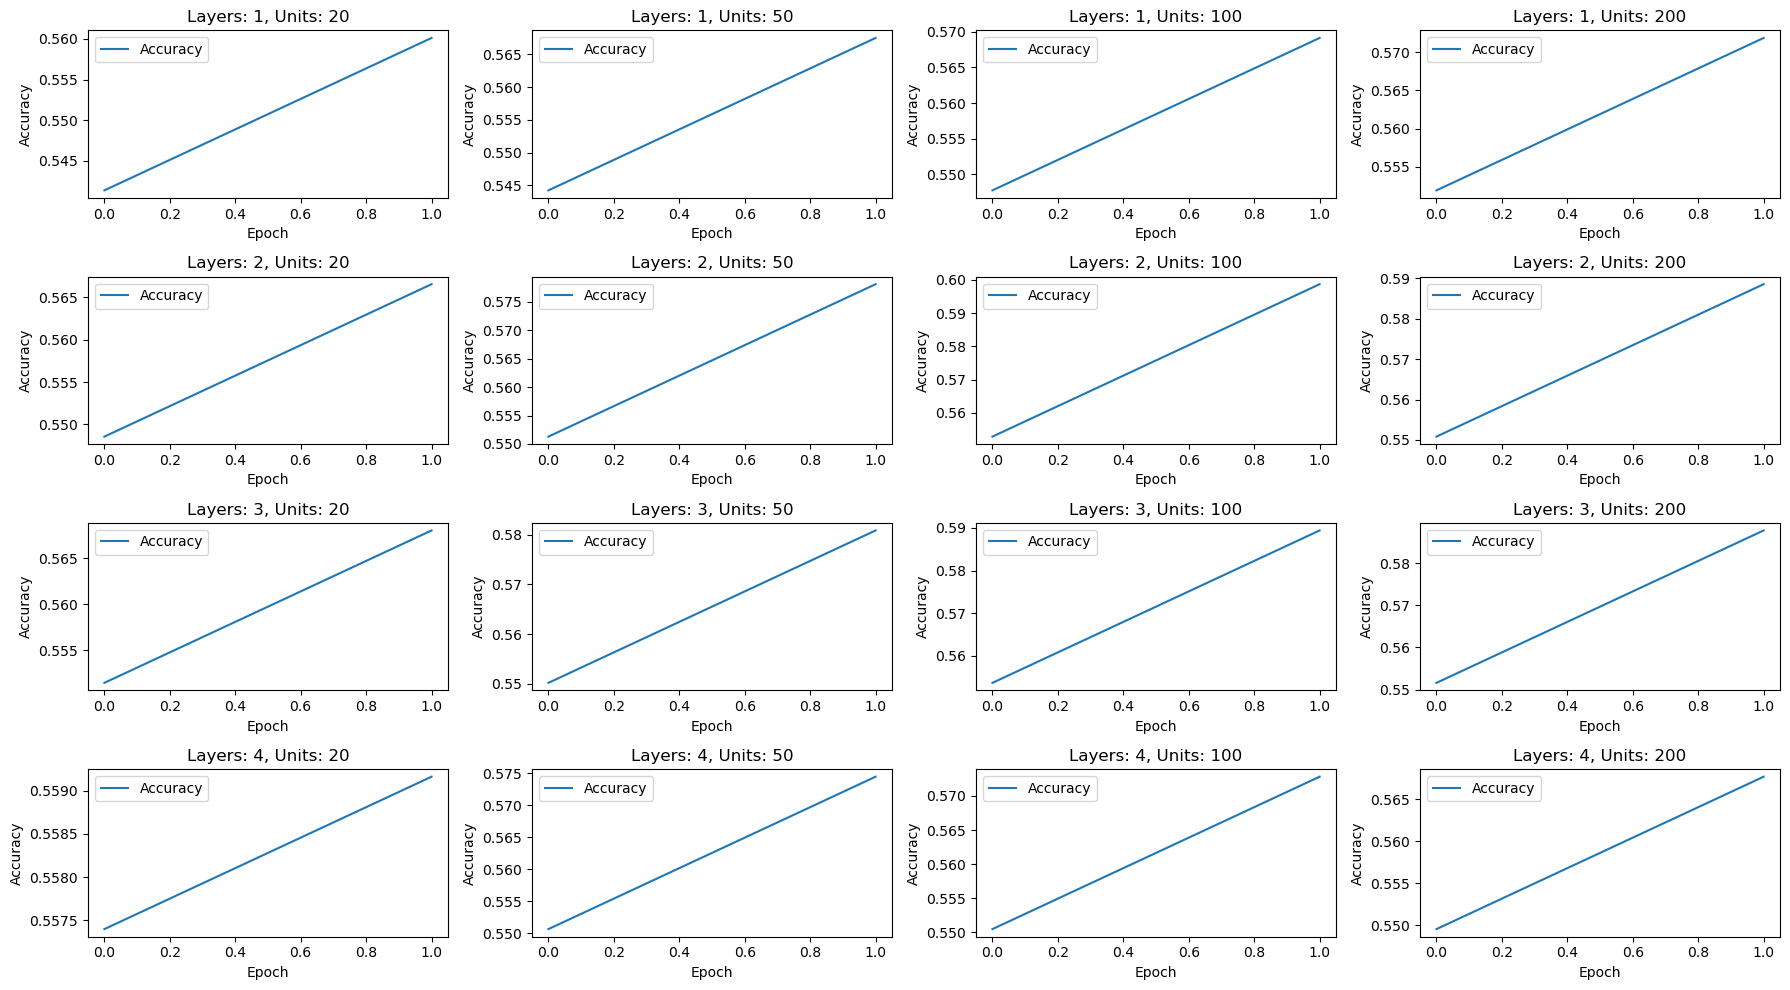

In [20]:
plt.figure(figsize=(18, 10))
for i, layers in enumerate(layer_options):
    for j, units in enumerate(unit_options):
        plt.subplot(len(layer_options), len(unit_options), i * len(unit_options) + j + 1)
        plt.plot(accuracy_history_lstm[i * len(unit_options) + j], label='Accuracy')
        plt.title(f'Layers: {layers}, Units: {units}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

plt.tight_layout()
plt.show()


### Loss Plot

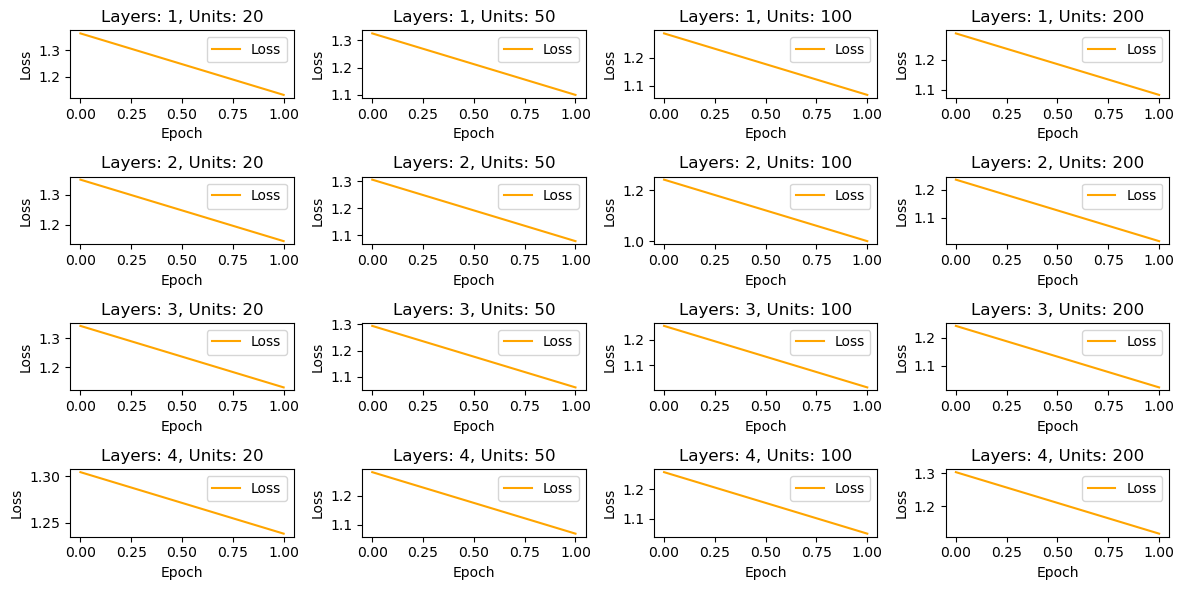

In [22]:
plt.figure(figsize=(12, 6))
for i, layers in enumerate(layer_options):
    for j, units in enumerate(unit_options):
        plt.subplot(len(layer_options), len(unit_options), i * len(unit_options) + j + 1)
        plt.plot(loss_history_lstm[i * len(unit_options) + j], label='Loss', color='orange')
        plt.title(f'Layers: {layers}, Units: {units}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

plt.tight_layout()
plt.show()


#### Model building function for BILSTM and Train and Evaluating the model

In [23]:
def build_bilstm_model(layers, units):
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=max_seq_length))
    
    for _ in range(layers - 1):
        model.add(Bidirectional(LSTM(units, return_sequences=True)))
    
    model.add(Bidirectional(LSTM(units, return_sequences=False)))  # Last BiLSTM layer with return_sequences=False
    
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Train and evaluate models
layer_options = [1, 2, 3, 4]
unit_options = [20, 50, 100, 200]

best_bilstm_accuracy = 0.0
best_bilstm_layers = 0
best_bilstm_units = 0

accuracy_history_bilstm = []  # To store accuracy values for each configuration
loss_history_bilstm = []      # To store loss values for each configuration

for layers in layer_options:
    for units in unit_options:
        print(f"Layers: {layers}, Units: {units}")
        
        bilstm_model = build_bilstm_model(layers, units)
        bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        history = History()  # Create a History callback
        
        bilstm_model.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.2, callbacks=[history])
        
        bilstm_score = bilstm_model.evaluate(X_test, y_test, verbose=0)
        
        accuracy = bilstm_score[1] * 100
        print(f"BiLSTM Accuracy: {accuracy:.2f}%")
        
        if accuracy > best_bilstm_accuracy:
            best_bilstm_accuracy = accuracy
            best_bilstm_layers = layers
            best_bilstm_units = units
        
        accuracy_history_bilstm.append(history.history['accuracy'])
        loss_history_bilstm.append(history.history['loss'])


Layers: 1, Units: 20
Epoch 1/2
49/49 [==============================] - 36s 629ms/step - loss: 1.3347 - accuracy: 0.5461 - val_loss: 1.2349 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 29s 595ms/step - loss: 1.1289 - accuracy: 0.5650 - val_loss: 1.1205 - val_accuracy: 0.5611
BiLSTM Accuracy: 57.99%
Layers: 1, Units: 50
Epoch 1/2
49/49 [==============================] - 46s 817ms/step - loss: 1.2905 - accuracy: 0.5559 - val_loss: 1.2395 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 37s 756ms/step - loss: 1.1124 - accuracy: 0.5661 - val_loss: 1.1176 - val_accuracy: 0.5617
BiLSTM Accuracy: 58.46%
Layers: 1, Units: 100
Epoch 1/2
49/49 [==============================] - 77s 1s/step - loss: 1.2686 - accuracy: 0.5500 - val_loss: 1.1655 - val_accuracy: 0.5559
Epoch 2/2
49/49 [==============================] - 71s 1s/step - loss: 1.0588 - accuracy: 0.5736 - val_loss: 1.0911 - val_accuracy: 0.5694
BiLSTM Accuracy: 58.35%
Layers: 1, Units: 

In [24]:
# Print the final best model accuracy for BiLSTM
print(f"Best BiLSTM Model - Layers: {best_bilstm_layers}, Units: {best_bilstm_units}")
print(f"Final Best BiLSTM Accuracy: {best_bilstm_accuracy:.2f}%")



Best BiLSTM Model - Layers: 2, Units: 200
Final Best BiLSTM Accuracy: 59.64%


#### Accuracy plot

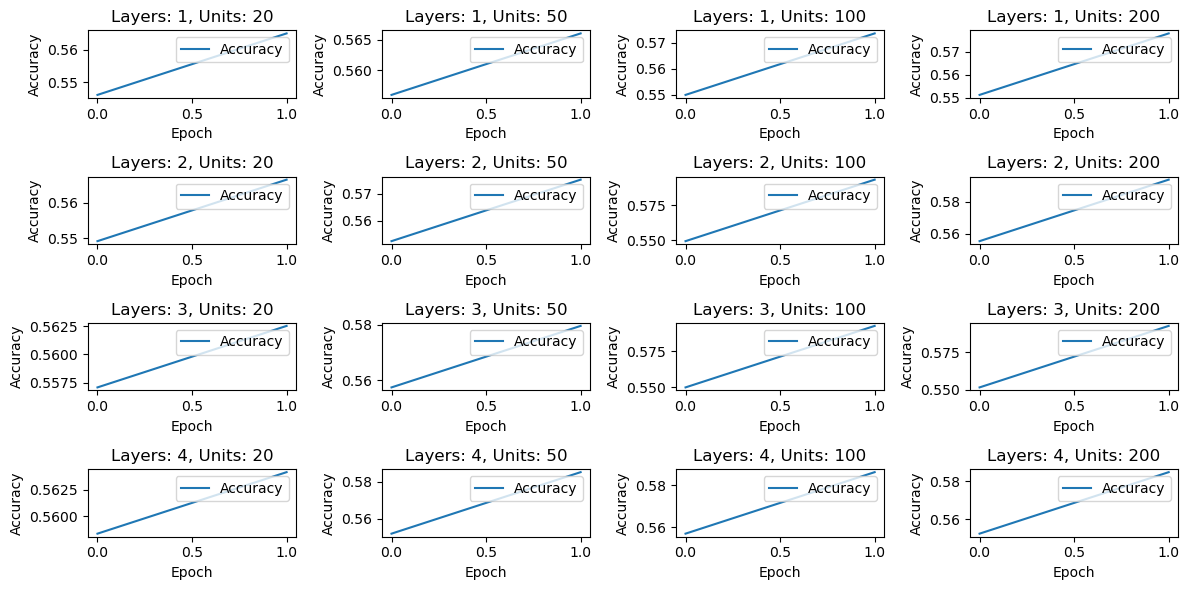

In [25]:
plt.figure(figsize=(12, 6))
for i, layers in enumerate(layer_options):
    for j, units in enumerate(unit_options):
        plt.subplot(len(layer_options), len(unit_options), i * len(unit_options) + j + 1)
        plt.plot(accuracy_history_bilstm[i * len(unit_options) + j], label='Accuracy')
        plt.title(f'Layers: {layers}, Units: {units}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

plt.tight_layout()
plt.show()


### Loss Plot

In [26]:
plt.figure(figsize=(12, 6))
for i, layers in enumerate(layer_options):
    for j, units in enumerate(unit_options):
        plt.subplot(len(layer_options), len(unit_options), i * len(unit_options) + j + 1)
        plt.plot(loss_history_bilstm[i * len(unit_options) + j], label='Loss', color='orange')
        plt.title(f'Layers: {layers}, Units: {units}')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

plt.tight_layout()
plt.show()
